<a href="https://colab.research.google.com/github/Babiamba/Neuroniniai-tinklai/blob/main/Colarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


In [3]:

upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))



Saving cats400.jpg to cats400.jpg


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0242
Epoch 2/50
1/1 [==============================] - 1s 887ms/step - loss: 0.8684
Epoch 3/50
1/1 [==============================] - 1s 898ms/step - loss: 0.3727
Epoch 4/50
1/1 [==============================] - 1s 901ms/step - loss: 0.0170
Epoch 5/50
1/1 [==============================] - 1s 887ms/step - loss: 0.0200
Epoch 6/50
1/1 [==============================] - 1s 896ms/step - loss: 0.0241
Epoch 7/50
1/1 [==============================] - 1s 899ms/step - loss: 0.0200
Epoch 8/50
1/1 [==============================] - 1s 896ms/step - loss: 0.0170
Epoch 9/50
1/1 [==============================] - 1s 888ms/step - loss: 0.0158
Epoch 10/50
1/1 [==============================] - 1s 869ms/step - loss: 0.0154
Epoch 11/50
1/1 [==============================] - 1s 885ms/step - loss: 0.0152
Epoch 12/50
1/1 [==============================] - 1s 887ms/step - loss: 0.0147
Epoch 13/50
1/1 [==============================] - 1

Saving cats400_2.jpg to cats400_2.jpg


/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 8 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


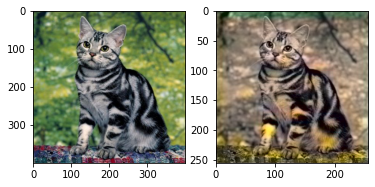

In [4]:
def processed_image(img):
  image = img.resize( (256, 256), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]

  Y /= 128    # Normalizuojame ivesties duomenys nuo -1 iki 1
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

X, Y, size = processed_image(img)

model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

model.compile(optimizer='adam', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=50)

upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X, Y, size = processed_image(img)

output = model.predict(X)

output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))